# Defining the click probability functions.
The goal of this notebook is define a function for the click probability. 
First it's defined the simplest expression, the probablility without including the factor $\eta$ and once it's known how to do it we define the complete function including $\eta$. 
As I'm learning Python first I have calculated how to do it without a function for being sure what I was doing and after I define the function.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial
%matplotlib inline

from scipy.optimize import curve_fit


import math
import time


Define first the function that I want to fit. I'll use first the easy version:
 $$R(N)=1-e^{-N}\sum_{i=0}^m(1-p_i)\frac{N^i}{i!}$$
 First of all we'll calculate step by step what we want to do in the function to understand what we're doing and after we'll write it in a function.

In [3]:
#Let's calculate here step by step what we want to do in our function.
N = np.array([0,1, 2, 3, 4, 5, 6]) #This will be the number of photons
N_new = N[...,np.newaxis]
p = np.array([1, 10, 100]) #This will be the probabilities for each 
                           #detection. (Values don't matter now)
i = np.arange(len(p))

In [4]:
print(N_new**i)  #This result give us the in the first column the
#vector N to the power of the first element of the i array.
# In the second column gives the vector N to the power of the
#second element of i and so on

H = N_new**i/factorial(i) #Now each column is divided by the
#corresponding i factorial value. First column divided by the
#factorial of the first element of i
print(H)
multiplication = H*(1-p) #Same as for factorial(i)
print(multiplication)

Summation = np.sum(multiplication, axis = 1) #Here we sum the 
#elements of the same row because the belong to the same number 
#of N photons. As an output we obtain a vector that contains the
#summation for each value of N
print('Sumation')
print(Summation)


R = 1 - np.exp(-N) * Summation #The output is a vector that contais 
# the click probability for efficiency 1 for each value of N
print('R')
print(R)


[[ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]
 [ 1  5 25]
 [ 1  6 36]]
[[  1.    0.    0. ]
 [  1.    1.    0.5]
 [  1.    2.    2. ]
 [  1.    3.    4.5]
 [  1.    4.    8. ]
 [  1.    5.   12.5]
 [  1.    6.   18. ]]
[[    0.     -0.     -0. ]
 [    0.     -9.    -49.5]
 [    0.    -18.   -198. ]
 [    0.    -27.   -445.5]
 [    0.    -36.   -792. ]
 [    0.    -45.  -1237.5]
 [    0.    -54.  -1782. ]]
Sumation
[    0.    -58.5  -216.   -472.5  -828.  -1282.5 -1836. ]
R
[  1.          22.52094731  30.23242118  24.5243898   16.165349
   9.64141703   5.550989  ]


Now we're ready to define the function:  $$R(N)=1-e^{N}\sum_{i=0}^m(1-p_i)\frac{N^i}{i!}$$

In [5]:
def Click1 (N, p):
#This function calculates the click probability for the simple
#case with efficiency equals to 1.
#Arguments: number of photons, N, and probability detection, p.
#In general both will be arrays.
    i = np.arange(len(p))
    N_new = N[..., np.newaxis]
    addend = (1-p) * N_new**i / factorial(i)  #This is a matrix that contains 
    # in each element one of the terms of the sumation. Each row corresponds
    # to the terms with the same number of N photons. Each column corresponds 
    # with the index of the summation.
    SUM = np.sum(addend, axis = 1) #each element of this vector is the sum for 
                              #each value of N
        
    # The returned value is a vector with the probabilities for each N
    return (1 - np.exp(-N) * SUM)


Now we'll create the complete function considering the efficiency $\eta$. 
$$R(N)=1-e^{-\eta N}\sum_{i=0}^m(1-p_i)\frac{(\eta N)^i}{i!}$$

In [6]:
#Let's calculate here step by step what we want to do in our function.
N = np.array([0, 1, 2, 3, 4, 5, 6]) #This will be the number of photons
eta = np.array([1, 2]) #This all the possible efficiencies
eta_new = eta[...,np.newaxis]
i = np.arange(len(p))
p = np.array([1, 10, 100]) #This will be the probabilities for each 
                           #detection. (Values don't matter now)



In [7]:
Neta = (N * eta_new)
#print(Neta)
Neta_new = Neta[...,np.newaxis]
addend = Neta_new**i / factorial(i) * (1-p)
print(addend)

SUM = np.sum(addend, axis = 2)
print(SUM)

#Now I have to multiply everything with the exponential that contais eta and N

R = 1-np.exp(-Neta)*SUM
print (R)

[[[    0.     -0.     -0. ]
  [    0.     -9.    -49.5]
  [    0.    -18.   -198. ]
  [    0.    -27.   -445.5]
  [    0.    -36.   -792. ]
  [    0.    -45.  -1237.5]
  [    0.    -54.  -1782. ]]

 [[    0.     -0.     -0. ]
  [    0.    -18.   -198. ]
  [    0.    -36.   -792. ]
  [    0.    -54.  -1782. ]
  [    0.    -72.  -3168. ]
  [    0.    -90.  -4950. ]
  [    0.   -108.  -7128. ]]]
[[    0.    -58.5  -216.   -472.5  -828.  -1282.5 -1836. ]
 [    0.   -216.   -828.  -1836.  -3240.  -5040.  -7236. ]]
[[  1.          22.52094731  30.23242118  24.5243898   16.165349
    9.64141703   5.550989  ]
 [  1.          30.23242118  16.165349     5.550989     2.08689891
    1.22881565   1.04445952]]


In [8]:
def Click2 (N, eta, p):
# This function calculates the click probability for the simple
# case without taking into account efficiency.
# Arguments: efficiency of the detector, eta; number of photons,
# N, and probability detection, p. In general all will be arrays.

    i = np.arange(len(p))
    eta_new = eta[...,np.newaxis]
    Neta = N * eta_new # First row of this matrix is N multiplied by eta1
                       # Second row is N multiplied by eta2, ...
    Neta_new = Neta[..., np.newaxis]
    addend = Neta_new**i / factorial(i) * (1-p) # We have a 3D array.
    # addend[i,j,k]. Index i is related with eta. Index j is related with N.
    # Index is related with i (iteration number of te series, not confuse with index i)
    
    SUM = np.sum(addend, axis = 2) #The result is a matrix. Each row corresponds
    # with a different efficiency. Each column correspond to a different number N
    # of photons
    
    return (1 - np.exp(-Neta) * SUM) # Same as in SUM


## Testing the functions
Now we're going to do some tests to check if the results of the functions are consistent.

In [9]:
N = np.array([1, 2, 3, 4, 5, 6]) #This will be the number of photons
eta = np.arange(2) /1 #This all the possible efficiencies
p = np.arange(6)/5 

In [10]:
Click1 (N, p)-Click2 (N, np.array([1]), p)

array([[ 0.,  0.,  0.,  0.,  0.,  0.]])

For the case $\eta = 1$ both functions give the same result

# Click probabilities with a loop

Here we calculate also the click probability but now using loops, which probabily is faster.

In [28]:

def Click3(N, eta, p):
        i = 0
        summ = 0
        j = 0
        R = np.zeros((len(eta),len(N)))
        while (j< len(eta)):
            while (i < len(p)):
                summ = summ + (1-p[i]) * (eta[j]*N)**i / factorial(i)
                i=i+1
            
            R[j,:] = 1-np.exp(-eta[j]*N)*summ
            j = j+1
        return R

First we want to check that we obtin the same results with Click3 and Click2

In [12]:
N = np.linspace(0,10,10) #This will be the number of photons
eta = np.arange(2) /1 #This all the possible efficiencies
p = np.arange(6) /5

print(Click3(N,eta,p)-Click2(N,eta,p))




[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.44882503  0.45450374  0.33882953  0.21826455  0.12785839
   0.06984298  0.0361268   0.01788199  0.00853519]]


The result shows that for efficiency 1 the results are the same but for different efficiency the result changes, therefore there is an error.

In [ ]:
#ticB = time.clock()
#Click3(N,eta,p)  #Fastest
#tocB = time.clock()


#tic = time.clock()
#Diif = Click2(N,eta,p)-Click3(N,eta,p)
#toc = time.clock()

#B = tocB-ticB
#print(B)
#C = toc-tic
#print(C)
#B-C

#print(Click2(N,eta,p))


#print(Click3(N,np.array([1]),p)-Click1(N,p))
#print(Click2(N,np.array([1]),p)-Click1(N,p))

# Fitting the click probability

I want to learn how to do a fit with a function with several parameters that can vary. Then I want to understand how works for a case that I found on the internet and after extrapolate the solution to my problem.



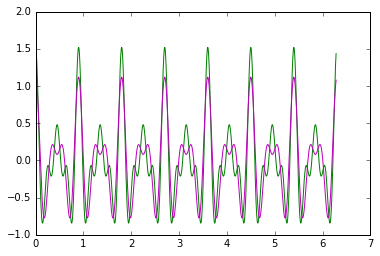

In [126]:
def fourier(x, *a):
    ret = a[0] * np.cos(np.pi / tau * x)
    for deg in range(1, len(a)):
        ret += a[deg] * np.cos((deg+1) * np.pi / tau * x)
    return ret

z = np.linspace(0, 2 * np.pi, 1000)
tau = 0.45
Ua = 0.12 * np.cos(1 * np.pi / tau * x) + \
     0.6 * np.cos(2 * np.pi / tau * x) + \
     0.4 * np.cos(3 * np.pi / tau * x) + \
    0.4 * np.cos(4 * np.pi / tau * x) 

popt, pcov = curve_fit(fourier, z, Ua, [1.0] * 1)

# Fit with 4 harmonics
popt, pcov = curve_fit(fourier, z, Ua, [1.0] * 4)

# Plot data, 15 harmonics, and first 3 harmonics
fig = plt.figure()
ax1 = fig.add_subplot(111)
p1, = plt.plot(z, Ua, 'g')
#p2, = plt.plot(z, fourier(z, *popt), 'r')
p3, = plt.plot(z, fourier(z, popt[0], popt[1], popt[2]), 'm')
plt.show()

Now I'll try to do a fit to my function Click4. 
First of all I create some synthetic data with Click4 and I add some random noise to these points

In [229]:
  
def Click4(N, eta, p):
        summ = 0
        for i in range(0,len(p)):
            summ = summ + (1-p[i]) * (eta*N)**i / factorial(i)
            
        R= 1-np.exp(-eta*N)*summ
        return R
    
def Click4fit(N, eta, *p):
        summ = 0
        for i in range(0,len(p)):
            summ = summ + (1-p[i]) * (eta*N)**i / factorial(i)
            
        R= 1-np.exp(-eta*N)*summ
        return R


In [230]:
mu = np.linspace(10, 1000, 500)
eta = np.array([0.01])
p = np.array([0.01, 0.1, 1])

#I create the synthetic data with the random noise    
Data = Click4 (mu, eta, p) + np.random.rand(len(mu)) * 0.001

###### One good idea for the future is programming something that shows directly the results of the fit

In [203]:
#We do the fitting
popt, pcov = curve_fit(Click4fit, mu, Data, [1.0] * (len(p)+1))


# One good idea for the future is programming something that
# shows directly the results of the fit
print ("eta = ", popt[0], "+/-", pcov[0,0]**0.5)
print ("p1 = ", popt[1], "+/-", pcov[1,1]**0.5)
print ("p2 = ", popt[2], "+/-", pcov[2,2]**0.5)
print ("p3 = ", popt[3], "+/-", pcov[3,3]**0.5)


eta =  0.00944554102791 +/- 2.00513402136e-05
p1 =  0.00970558327669 +/- 0.000201950776399
p2 =  0.11014473838 +/- 0.000853753570346
p3 =  1.09871251063 +/- 0.00321615683328


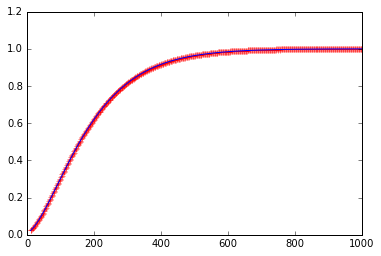

In [198]:
plt.plot(mu, Data, '+r')
plt.plot(mu, Click4(mu, popt[0],np.array([popt[1],popt[2],popt[3]])),'b')

Now that we know how to fit this function we want to write a programme which makes several fittings with different number of parameters. In other words to tell the programme to fit the function for different number of p. We want this because after we'll calculate the chi squared of each of this fits and decide which fit is better.

###### Attention with the two warnings

In [270]:
m = 5 # This is the maximum number of parameters that we are
      # going to fit (including eta). Therefore the number 
      # of p parameters is m-1
        
popt_array = np.zeros((m-1, m)) #We create the matirx where we are going
# to save the data of every fit. First row for the two fitting 
# parameters, next row for three fitting parameters and so on. 
# We introduce the zeros for saving all the fitting parameters 
# on an array.

####################################################################################
# ATTENTION WHEN DOING THE DOING CHI SQUARED WITH THE ZEROS
####################################################################################

pcov_array = np.zeros((m-1, m))
j = 0
for i in range(2,m+1):
    popt, pcov = curve_fit(Click4fit, mu, Data, [1.0] * (i))
    for j in range(0,i):
        pcov_array [i-2, j] = pcov[j,j]
        popt_array [i-2, j] = popt[j]
        

####################################################################################
# ATTENTION I'M ONLY TAKING THE DIAGONAL ELEMENTS OF pcov
####################################################################################     

In [266]:
popt, pcov = curve_fit(Click4fit, mu, Data, [1.0] * (2))